# Example of Calculation and Analysis of Synthetic Receiver Functions

This notebook demonstrates calculation of synthetic receiver functions and H-K, Sequential H-K, and Resonance filtering analysis based on [rfsed](https://github.com/akinremisa/rfsed) package

The required functions are first imported 

In [12]:
#%% Importing the libraries
import numpy as np
from rfsed.synrf import synrf
import os 
from rfsed.SynthAnalysis import hkSynth, plothkSynth, hkSeqSynth, plothkSeqSynth, ResonanceFilt, plotfiltSynthrf
from rfsed.util import save_plot

## H-K Stacking of Synthetic Receiver Functions

In the first step, the synthetic receiver function parameters are defined and the synthetic data is calculated using synrf function

In [13]:
#----------------------------------------------------------
# Synthetic Parameters
moddim = 4
rayp = 0.05826535137278129   #for 60 degree distance
gaussian = 1.25
preonset = 10
n = 2001
delta = 0.025
#----------------------------------------------------------
# Model
#----------------------------------------------------------
depth = np.array([35, 77.5])
vp = np.array([6.90, 8.045])
vs = np.array([3.951172240000002, 4.49])
rho = np.array([2.939564099940003, 3.299])
#----------------------------------------------------------
# Synthetic Calculation 
Synth=synrf(depth, vp, vs, rho, rayp, dt=delta, npts=n, ipha=1)
Synth.run_fwd()
Synth.filter(freqmin=0.05, freqmax=1.25, order=2, zerophase=True)
rf=Synth.run_deconvolution(pre_filt=[0.05, 1.25], preonset=preonset, gaussian=gaussian)

H-K Stacking analysis of the synthetic receiver function is done here. The parameter of the H-K Stacking are first defined and the analysis is done and the results are visualised and saved

In this case, an Earth model with no sediment is used and the One-layer H-K Stacking method is able to retrieve the accurate Moho depth and Vp/Vs estimates.

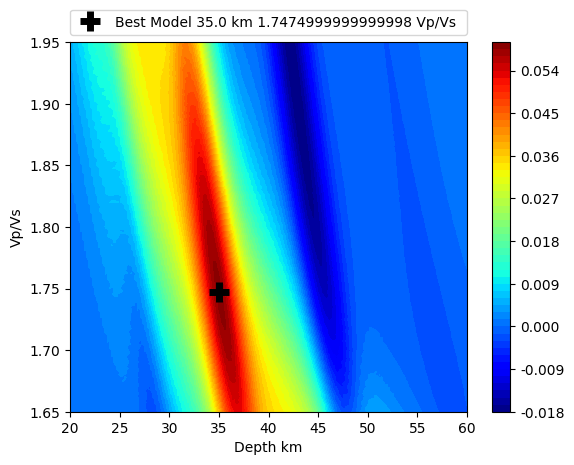

Best depth:  35.0 Best Vp/Vs: 1.7474999999999998 Max stack:  0.059054140811756056


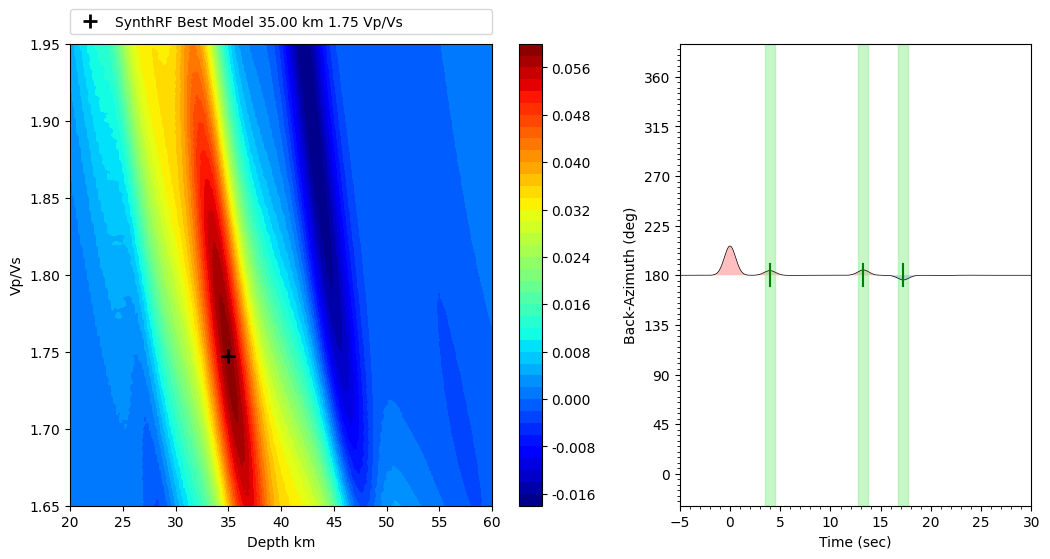

In [14]:
# Define the data and the parameters
rf=(rf[0]).data
l = len(rf)
t = np.arange(0, l)
t = (delta *  t) - preonset
Vp=vp[0]
K= np.linspace(1.65,1.95,121)
H=np.linspace(20,60,201)
w1, w2, w3 = [0.6, 0.3, 0.1]
#----------------------------------------------------------
# Define save path
savedir=save_plot()
savepath = savedir + '/SynthExp_HK_Result/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)
#-------------------------------------------------------------------------
# Do the H-K Stacking Analysis
HKResultSynth=hkSynth(Synthrf=rf, time=t, rayp=rayp, w1 = w1, w2 = w2, w3 = w3, K= K, H=H, Vp = Vp, layer = None)
plothkSynth(HKResultSynth, g = [75.,10., 15., 2.5], rmneg = None, format = 'jpg', savepath=savepath)

## Sequential H-K Stacking of Receiver Functions

For this analysis, two streams of receiver functions are calculated for the same earth model (high and low frequency receiver functions) for the purpose of Sequential H-K Stacking

The Sequential H-K Stacking analysis is performed and the results are visualised

The Earth model and the synthetic receiver function parameters are defined 

In [15]:
#----------------------------------------------------------
# Synthetic Parameters
moddim = 4
rayp = 0.05826535137278129   #for 60 degree distance
gaussian_Moho = 1.25
gaussian_Sed = 5
preonset = 10
n = 2001
delta = 0.025
#----------------------------------------------------------
# Model
#----------------------------------------------------------
depth = np.array([2, 35, 77.5])
vp = np.array([3, 6.90, 8.045])
VpSed=vp[0]
VpCrust=vp[1]
VpMoho=vp[1]
SedH=depth[0]
VsSed=0.7858 - 1.2344*VpSed + 0.7949*VpSed**2 - 0.1238*VpSed**3 + 0.0064*VpSed**4
SedDen=((1.6612*(VpSed)) - (0.4721 * ((VpSed)**2)) + (0.0671* ((VpSed)**3)) - (0.0043* ((VpSed)**4)) + (0.000106* ((VpSed)**5)))
VsCrust=0.7858 - 1.2344*VpCrust + 0.7949*VpCrust**2 - 0.1238*VpCrust**3 + 0.0064*VpCrust**4
CrustDen=((1.6612*(VpCrust)) - (0.4721 * ((VpCrust)**2)) + (0.0671* ((VpCrust)**3)) - (0.0043* ((VpCrust)**4)) + (0.000106* ((VpCrust)**5)))
vs = np.array([VsSed,VsCrust, 4.49])
rho = np.array([SedDen, CrustDen, 3.299])

The high frequency receiver function for the sediment layer is calculated

In [16]:
Synth=synrf(depth, vp, vs, rho, rayp, dt=delta, npts=n, ipha=1)
Synth.run_fwd()
Synth.filter(freqmin=0.05, freqmax=1.25, order=2, zerophase=True)
rfSynthSed=Synth.run_deconvolution(pre_filt=[0.05, 1.25], preonset=preonset, gaussian=gaussian_Sed)
rfSynthSed=(rfSynthSed[0]).data

The low frequency receiver function for the Moho layer is calculated

In [17]:
Synth=synrf(depth, vp, vs, rho, rayp, dt=delta, npts=n, ipha=1)
Synth.run_fwd()
Synth.filter(freqmin=0.05, freqmax=1.25, order=2, zerophase=True)
rfSynthMoho=Synth.run_deconvolution(pre_filt=[0.05, 1.25], preonset=preonset, gaussian=gaussian_Moho)
rfSynthMoho=(rfSynthMoho[0]).data

The Sequential H-k Stacking parameters, data, data parameters, and save path are defined

In [18]:
savedir=save_plot()
savepath = savedir + '/SynthExp_SeqHK_Result/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)
w1, w2, w3 = [0.6, 0.3, 0.1]
KSed= np.linspace(1.65,2.25,201)
HSed=np.linspace(0,10,201)
w1Sed, w2Sed, w3Sed = [0.6, 0.3, 0.1]
KMoho= np.linspace(1.65,1.95,121)
HMoho=np.linspace(20,60,201)
w1Moho, w2Moho, w3Moho = [0.6, 0.3, 0.1]
l = len(rfSynthMoho)
t = np.arange(0, l)
t = (delta *  t) - preonset

The Sequential H-K Stacking is done

In this synthetic case, the sequential H-K stacking does not retrieve accurate estimate of the Moho depth and Vp/Vs due to coeval arrival of the sediment reverberation phases and the Moho phases.

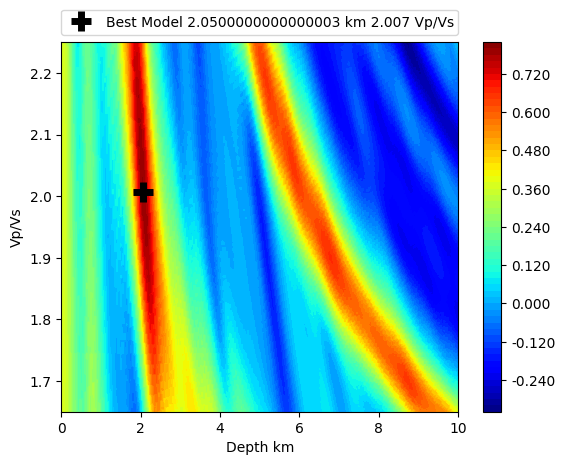

Best Sediment depth:  2.0500000000000003 Best Sediment Vp/Vs: 2.007 Max stack:  0.8020331698617453


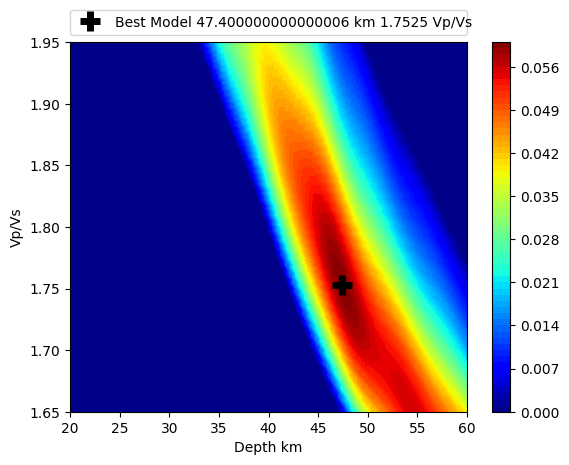

Best Moho depth:  47.400000000000006 Best Moho Vp/Vs: 1.7525 Max stack:  0.8020331698617453


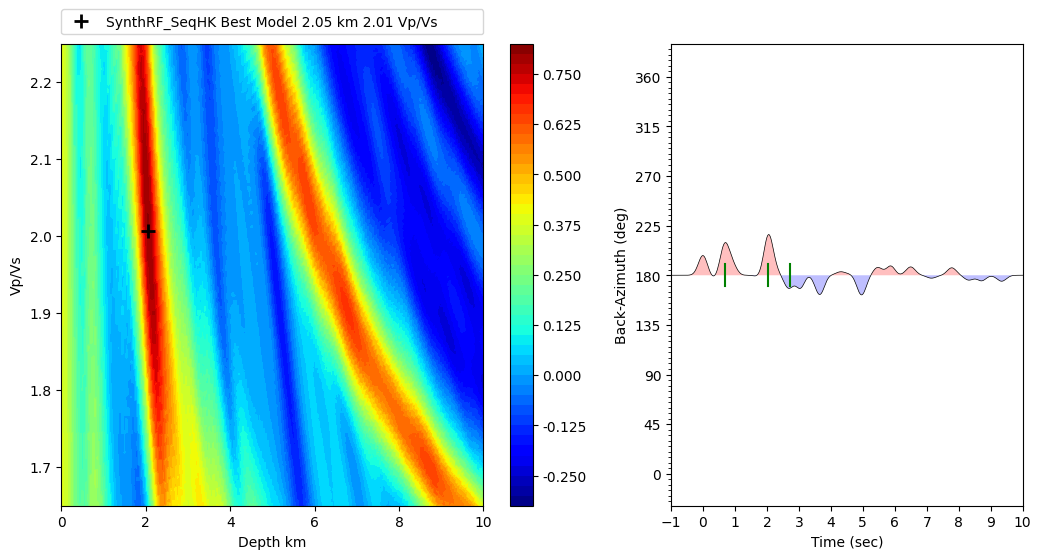

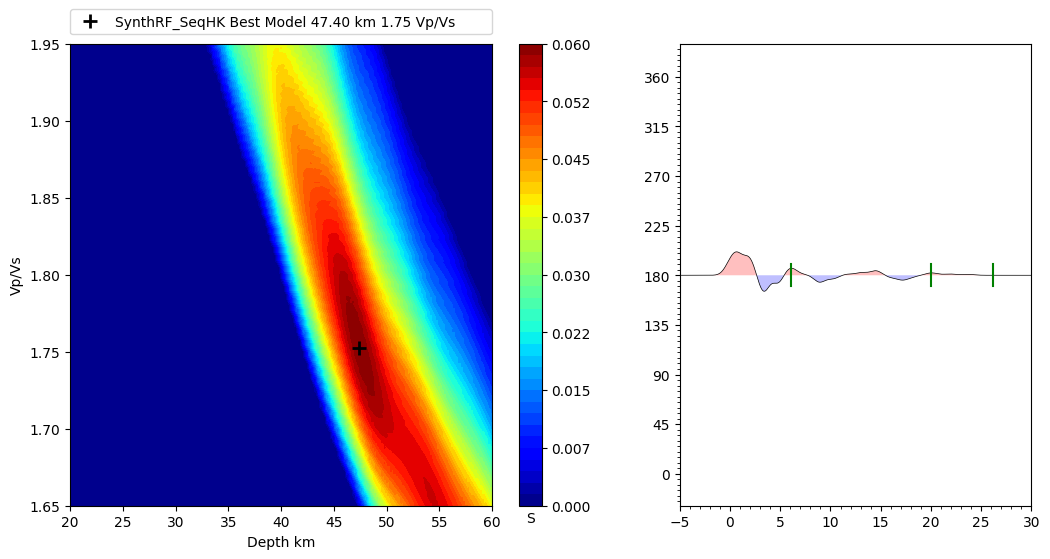

In [19]:
SynthSeqHKResult=hkSeqSynth(rfSynthSed=rfSynthSed, rfSynthMoho=rfSynthMoho, time=t, rayp=rayp, 
                             HSed=HSed, KSed=KSed, VpSed=VpSed, w1Sed=w1Sed, w2Sed=w2Sed, w3Sed=w3Sed, 
                             HMoho=HMoho, KMoho=KMoho, VpMoho=VpMoho, w1Moho=w1Moho, w2Moho=w2Moho, 
                             w3Moho=w3Moho, g = [75.,10., 15., 2.5], rmneg = None)
plothkSeqSynth(SynthSeqHKResult, g = [75.,10., 15., 2.5], rmneg = None, format = 'jpg', savepath=savepath)

## Resonance Filtering of Synthetic Receiver Functions

The Earth model is defined and synthetic receiver function is calculated using defined data parameters

In [20]:
#----------------------------------------------------------
# Synthetic Parameters
moddim = 4
rayp = 0.05826535137278129   #for 60 degree distance
gaussalp = 1.25
preonset = 10
n = 2001
delta = 0.025
#----------------------------------------------------------
# Model Parameters
#----------------------------------------------------------
depth = np.array([2, 35, 77.5])
vp = np.array([3, 6.90, 8.045])
VpSed=vp[0]
VpCrust=vp[1]
VpMoho=vp[1]
SedH=depth[0]
VsSed=0.7858 - 1.2344*VpSed + 0.7949*VpSed**2 - 0.1238*VpSed**3 + 0.0064*VpSed**4
SedDen=((1.6612*(VpSed)) - (0.4721 * ((VpSed)**2)) + (0.0671* ((VpSed)**3)) - (0.0043* ((VpSed)**4)) + (0.000106* ((VpSed)**5)))
VsCrust=0.7858 - 1.2344*VpCrust + 0.7949*VpCrust**2 - 0.1238*VpCrust**3 + 0.0064*VpCrust**4
CrustDen=((1.6612*(VpCrust)) - (0.4721 * ((VpCrust)**2)) + (0.0671* ((VpCrust)**3)) - (0.0043* ((VpCrust)**4)) + (0.000106* ((VpCrust)**5)))
vs = np.array([VsSed,VsCrust, 4.49])
rho = np.array([SedDen, CrustDen, 3.299])
Synth=synrf(depth, vp, vs, rho, rayp, dt=delta, npts=n, ipha=1)
Synth.run_fwd()
Synth.filter(freqmin=0.05, freqmax=1.25, order=2, zerophase=True)
rf=Synth.run_deconvolution(pre_filt=[0.05, 1.25], preonset=preonset, gaussian=gaussian)
rf=(rf[0]).data
l = len(rf)
t = np.arange(0, l)
t = (delta *  t) - preonset

The save directory is defined

In [21]:
savedir=save_plot()
savepath = savedir + '/SynthExp_ResonanceFlt/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The sediment signals are filtered out using a resonance filter

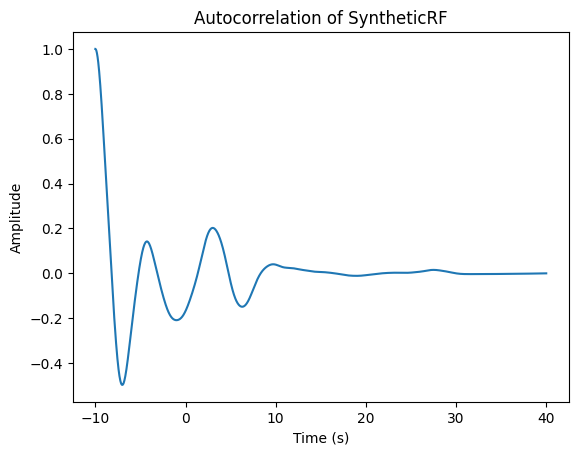

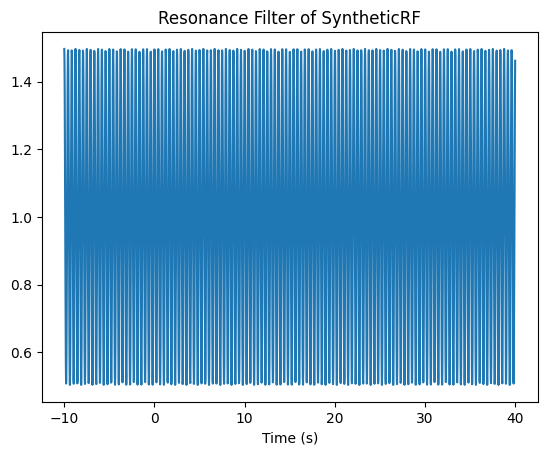

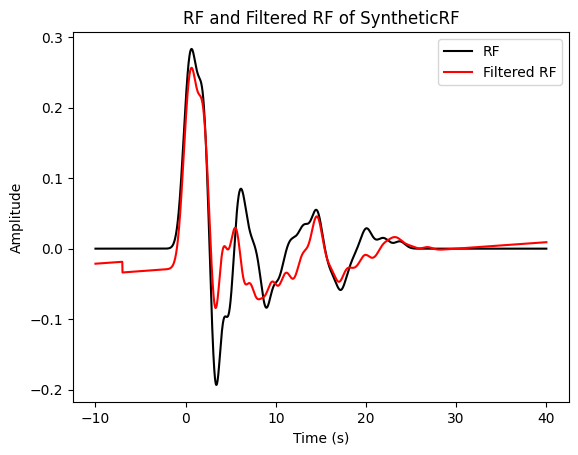

In [22]:
RemoveResonance= ResonanceFilt(Synthrf=rf, time=t)
# print(RemoveResonance)
plotfiltSynthrf(RemoveResonance, savepath, format = 'jpg')